<a href="https://colab.research.google.com/github/MikolajRowicki/ORTHO/blob/main/ortho_FL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

print("KOmbajn")

KOmbajn


In [ ]:
def dtw_distance(seq1, seq2):
    """
    Oblicza dystans DTW między dwiema sekwencjami punktów (np. [x, y]).

    Parametry:
        seq1, seq2: numpy arrays o wymiarach (n, 2) oraz (m, 2)

    Zwraca:
        dtw[n, m]: skalar reprezentujący dystans DTW między sekwencjami.
    """
    n = len(seq1)
    m = len(seq2)
    dtw = np.full((n+1, m+1), np.inf)
    dtw[0, 0] = 0

    for i in range(1, n+1):
        for j in range(1, m+1):
            cost = np.linalg.norm(seq1[i-1] - seq2[j-1])  # euklidesowa odległość
            dtw[i, j] = cost + min(dtw[i-1, j],    # wstawienie
                                   dtw[i, j-1],    # usunięcie
                                   dtw[i-1, j-1])  # dopasowanie
    return dtw[n, m]

In [ ]:
print("Hello")

Hello


In [ ]:
print("mee")

mee


In [ ]:
print("EEEE")

EEEE


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import glob
import os
# Pobranie pierwszych 40 plików CSV w katalogu data/full_dta
csv_files = sorted(glob.glob("./drive/MyDrive/ortho/data/*.csv"))[:40]

# Inicjalizacja ramki danych
limited_data = pd.DataFrame()

# Wczytanie pierwszych 40 plików
for file in csv_files:
    try:
        df = pd.read_csv(file)

        # Dodanie danych do ramki
        limited_data = pd.concat([limited_data, df], ignore_index=True)
    except Exception as e:
        print(f"Błąd podczas przetwarzania pliku {file}: {e}")

# Wyświetlenie kilku pierwszych wierszy
print('--- Pierwsze 40 plików ---')
print(limited_data.head())


<ipython-input-4-a5ac240d0c34>:13: DtypeWarning: Columns (24) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)
<ipython-input-4-a5ac240d0c34>:13: DtypeWarning: Columns (24) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)
<ipython-input-4-a5ac240d0c34>:13: DtypeWarning: Columns (24) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)
<ipython-input-4-a5ac240d0c34>:13: DtypeWarning: Columns (24) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)
<ipython-input-4-a5ac240d0c34>:13: DtypeWarning: Columns (24) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)
<ipython-input-4-a5ac240d0c34>:13: DtypeWarning: Columns (24) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)
<ipython-input-4-a5ac240d0c34>:13:

--- Pierwsze 40 plików ---
              ID        Date Consent Team_Name  Selected_Language  \
0  20240102-0000  20240102.0    True    BJ2 00                0.0   
1  20240102-0000  20240102.0    True    BJ2 00                0.0   
2  20240102-0000         NaN     NaN       NaN                NaN   
3  20240102-0000         NaN     NaN       NaN                NaN   
4  20240102-0000         NaN     NaN       NaN                NaN   

  Consent_Time_X_axis  Age_X_axis  Companionship_X_axis Question_Time_X_axis  \
0        09:30:48:500        25.0                   1.0         09:30:55:925   
1        09:30:48:500        25.0                   1.0         09:30:55:925   
2                 NaN         NaN                   NaN                  NaN   
3                 NaN         NaN                   NaN                  NaN   
4                 NaN         NaN                   NaN                  NaN   

  Consent_Time_Y_axis  ...  ClosingTime.1     Time Mistake Completed.1  \
0  

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
limited_data.head()

,ID,Date,Consent,Team_Name,Selected_Language,Consent_Time_X_axis,Age_X_axis,Companionship_X_axis,Question_Time_X_axis,Consent_Time_Y_axis,Age_Y_axis,Companionship_Y_axis,Question_Time_Y_axis,StartTime,ClosingTime,Completed,TerminationType,Track_ID,Difficulty_Level,StartTime.1,ClosingTime.1,Time,Mistake,Completed.1,InterfaceMode_Time,InterfaceMode_Mode,Points_X,Points_Y,Points_Time,Points_Status
0,20240102-0000,20240102.0,True,BJ2 00,0.0,09:30:48:500,25.0,1.0,09:30:55:925,09:30:27:247,24.0,1.0,09:30:40:859,09:30:27:247,09:38:18:265,True,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20240102-0000,20240102.0,True,BJ2 00,0.0,09:30:48:500,25.0,1.0,09:30:55:925,09:30:27:247,24.0,1.0,09:30:40:859,09:30:27:247,09:38:18:265,True,2.0,2.0,0.0,09:31:04:583,09:31:49:178,44594.0,False,True,NaN,NaN,NaN,NaN,NaN,NaN
2,20240102-0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,09:31:04:583,0.0
3,20240102-0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,09:31:04:615,1.0
4,20240102-0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,09:31:04:649,1.0


In [ ]:
completed_track_40 =limited_data.loc[(limited_data['Track_ID'] == 2) & (limited_data['Completed.1'] == True), ]

In [ ]:
completed_track_40.head()

,ID,Date,Consent,Team_Name,Selected_Language,Consent_Time_X_axis,Age_X_axis,Companionship_X_axis,Question_Time_X_axis,Consent_Time_Y_axis,Age_Y_axis,Companionship_Y_axis,Question_Time_Y_axis,StartTime,ClosingTime,Completed,TerminationType,Track_ID,Difficulty_Level,StartTime.1,ClosingTime.1,Time,Mistake,Completed.1,InterfaceMode_Time,InterfaceMode_Mode,Points_X,Points_Y,Points_Time,Points_Status
1,20240102-0000,20240102.0,True,BJ2 00,0.0,09:30:48:500,25.0,1.0,09:30:55:925,09:30:27:247,24.0,1.0,09:30:40:859,09:30:27:247,09:38:18:265,True,2.0,2.0,0.0,09:31:04:583,09:31:49:178,44594.0,False,True,NaN,NaN,NaN,NaN,NaN,NaN
4463,20240102-0001,20240102.0,True,BJ2 01,1.0,09:40:15:516,32.0,0.0,09:40:22:289,09:39:48:506,39.0,0.0,09:40:06:774,09:39:48:506,09:46:01:395,True,2.0,2.0,0.0,09:40:35:135,09:41:36:113,60977.0,False,True,NaN,NaN,NaN,NaN,NaN,NaN
7693,20240102-0002,20240102.0,True,BJ2 02,1.0,09:52:09:312,33.0,0.0,09:52:17:704,09:52:02:471,30.0,0.0,09:52:14:367,09:52:02:471,09:57:00:202,False,2.0,2.0,0.0,09:52:58:211,09:53:49:730,51518.0,False,True,NaN,NaN,NaN,NaN,NaN,NaN
9756,20240102-0002,20240102.0,True,BJ2 02,1.0,09:52:09:312,33.0,0.0,09:52:17:704,09:52:02:471,30.0,0.0,09:52:14:367,09:52:02:471,09:57:00:202,False,2.0,2.0,0.0,09:54:01:724,09:54:41:530,39806.0,False,True,NaN,NaN,NaN,NaN,NaN,NaN
11698,20240102-0002,20240102.0,True,BJ2 02,1.0,09:52:09:312,33.0,0.0,09:52:17:704,09:52:02:471,30.0,0.0,09:52:14:367,09:52:02:471,09:57:00:202,False,2.0,2.0,0.0,09:54:51:156,09:55:15:048,23890.0,False,True,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
min_row_index = completed_track_40['Time'].idxmin()
min_row = completed_track_40.loc[min_row_index]
print(min_row)
print(min_row_index)

ID                      20240126-0099
Date                       20240126.0
Consent                          True
Team_Name                      BJQ 99
Selected_Language                 0.0
Consent_Time_X_axis      18:10:07:491
Age_X_axis                       13.0
Companionship_X_axis              0.0
Question_Time_X_axis     18:10:11:929
Consent_Time_Y_axis      18:10:09:193
Age_Y_axis                       15.0
Companionship_Y_axis              0.0
Question_Time_Y_axis     18:10:17:402
StartTime                18:10:07:491
ClosingTime              18:15:25:509
Completed                       False
TerminationType                   0.0
Track_ID                          2.0
Difficulty_Level                  0.0
StartTime.1              18:12:03:407
ClosingTime.1            18:12:07:981
Time                           4571.0
Mistake                         False
Completed.1                      True
InterfaceMode_Time                NaN
InterfaceMode_Mode                NaN
Points_X    

In [ ]:
# Inicjalizacja listy, która będzie przechowywać indeksy spełniające warunek
selected_indices = []

# Iteracja po kolejnych wierszach zaczynając od wiersza po min_row_index
for idx in limited_data.index[limited_data.index > min_row_index]:
    if pd.notna(limited_data.loc[idx, 'Date']):
        # Gdy napotkamy pierwszy nie-NaN, przerywamy pętlę
        break
    selected_indices.append(idx)

# Wyciągnięcie wierszy z limited_data
best_trajectory = limited_data.loc[selected_indices]

In [ ]:
len(best_trajectory)

272

In [ ]:
# Lista do przechowywania wybranych wierszy
selected_rows = []

# Wybieramy wiersze nagłówkowe spełniające warunki
header_mask = (limited_data['Track_ID'] == 2) & (limited_data['Completed.1'] == True) & (limited_data['Date'].notna())
header_indices = limited_data.index[header_mask].tolist()

# Iterujemy po każdej pozycji nagłówkowej
for header_idx in header_indices:
    # Dodaj wiersz nagłówkowy
    selected_rows.append(limited_data.loc[header_idx])

    # Iterujemy po kolejnych wierszach, dopóki kolumna Date jest NaN
    next_idx = header_idx + 1
    while next_idx in limited_data.index and pd.isna(limited_data.loc[next_idx, 'Date']):
        selected_rows.append(limited_data.loc[next_idx])
        next_idx += 1

# Tworzymy wynikową ramkę danych
full_data_completed_track_2 = pd.DataFrame(selected_rows)

print(full_data_completed_track_2)

In [ ]:
best_trajectory.head()

,ID,Date,Consent,Team_Name,Selected_Language,Consent_Time_X_axis,Age_X_axis,Companionship_X_axis,Question_Time_X_axis,Consent_Time_Y_axis,Age_Y_axis,Companionship_Y_axis,Question_Time_Y_axis,StartTime,ClosingTime,Completed,TerminationType,Track_ID,Difficulty_Level,StartTime.1,ClosingTime.1,Time,Mistake,Completed.1,InterfaceMode_Time,InterfaceMode_Mode,Points_X,Points_Y,Points_Time,Points_Status
6827806,20240126-0099,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,18:12:03:407,NaN,NaN,NaN,True,NaN,NaN,0.0,0.0,18:12:03:407,0.0
6827807,20240126-0099,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,18:12:03:407,NaN,NaN,NaN,True,NaN,NaN,1.0,0.0,18:12:03:458,1.0
6827808,20240126-0099,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,18:12:03:407,NaN,NaN,NaN,True,NaN,NaN,3.0,0.0,18:12:03:490,1.0
6827809,20240126-0099,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,18:12:03:407,NaN,NaN,NaN,True,NaN,NaN,6.0,0.0,18:12:03:507,1.0
6827810,20240126-0099,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,18:12:03:407,NaN,NaN,NaN,True,NaN,NaN,11.0,0.0,18:12:03:523,1.0


In [ ]:
# Utworzenie kolumny game_id poprzez połączenie kolumn 'ID' i 'StartTime.1'
best_trajectory['Game_id'] = best_trajectory['ID'].astype(str) + "_" + best_trajectory['StartTime.1'].astype(str)

# Wybranie kolumn Points_X, Points_Y oraz game_id do nowej ramki
best_points = best_trajectory[['Points_X', 'Points_Y', 'Game_id']].copy()

In [ ]:
best_points.head()

,Points_X,Points_Y,Game_id
6827806,0.0,0.0,20240126-0099_18:12:03:407
6827807,1.0,0.0,20240126-0099_18:12:03:407
6827808,3.0,0.0,20240126-0099_18:12:03:407
6827809,6.0,0.0,20240126-0099_18:12:03:407
6827810,11.0,0.0,20240126-0099_18:12:03:407


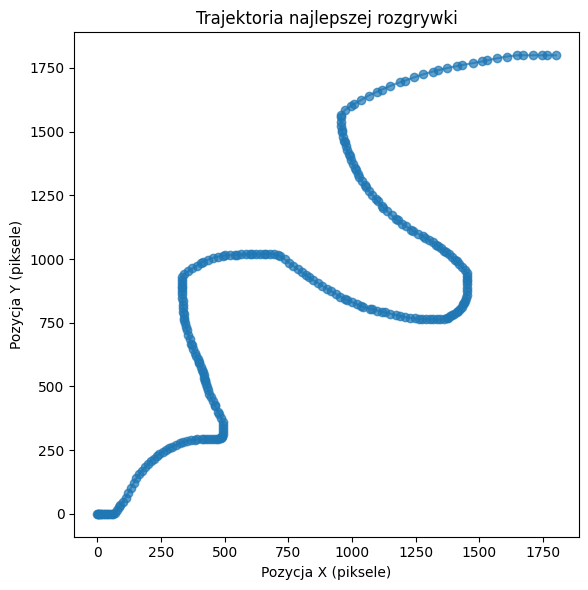

In [ ]:
result_sorted = best_trajectory.sort_values(by='Points_Time')

plt.figure(figsize=(8, 6))
plt.plot(result_sorted['Points_X'], result_sorted['Points_Y'], marker='o', linestyle='-', alpha=0.7)
plt.xlabel("Pozycja X (piksele)")
plt.ylabel("Pozycja Y (piksele)")
plt.title("Trajektoria najlepszej rozgrywki")
plt.gca().set_aspect('equal', adjustable='box')
plt.tight_layout()
plt.show()

In [ ]:
limited_data['Track_ID'] = limited_data['Track_ID'].ffill()
limited_data['Completed.1'] = limited_data['Completed.1'].ffill()
limited_data['StartTime.1'] = limited_data['StartTime.1'].ffill()
limited_data['ID'] = limited_data['ID'].ffill()

# Filtrowanie limited_data dla tych ID
completed_track = limited_data.loc[(limited_data['Track_ID'] == 2) & (limited_data['Completed.1'] == True), ]
completed_track = completed_track.dropna(subset=['Points_X'])

In [ ]:
# Tworzenie nowej kolumny Game_id jako połączenie ID i StartTime.1
completed_track['Game_id'] = (
    completed_track['ID'].astype(str) + "_" + completed_track['StartTime.1'].astype(str)
)

# Usunięcie kolumn ID oraz StartTime.1
completed_track = completed_track.drop(columns=['ID', 'StartTime.1'])

In [ ]:
completed_track.head(30)

,Date,Consent,Team_Name,Selected_Language,Consent_Time_X_axis,Age_X_axis,Companionship_X_axis,Question_Time_X_axis,Consent_Time_Y_axis,Age_Y_axis,Companionship_Y_axis,Question_Time_Y_axis,StartTime,ClosingTime,Completed,TerminationType,Track_ID,Difficulty_Level,ClosingTime.1,Time,Mistake,Completed.1,InterfaceMode_Time,InterfaceMode_Mode,Points_X,Points_Y,Points_Time,Points_Status,Game_id
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,True,NaN,NaN,0.0,0.0,09:31:04:583,0.0,20240102-0000_09:31:04:583
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,True,NaN,NaN,1.0,0.0,09:31:04:615,1.0,20240102-0000_09:31:04:583
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,True,NaN,NaN,2.0,0.0,09:31:04:649,1.0,20240102-0000_09:31:04:583
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,True,NaN,NaN,3.0,0.0,09:31:04:683,1.0,20240102-0000_09:31:04:583
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,True,NaN,NaN,4.0,0.0,09:31:04:716,1.0,20240102-0000_09:31:04:583
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,True,NaN,NaN,5.0,0.0,09:31:04:766,1.0,20240102-0000_09:31:04:583
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,True,NaN,NaN,6.0,0.0,09:31:04:782,1.0,20240102-0000_09:31:04:583
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,True,NaN,NaN,7.0,0.0,09:31:04:816,1.0,20240102-0000_09:31:04:583
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,True,NaN,NaN,8.0,0.0,09:31:04:849,1.0,20240102-0000_09:31:04:583
11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,True,NaN,NaN,9.0,0.0,09:31:04:883,1.0,20240102-0000_09:31:04:583


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Zakładam, że dane są w zmiennej `limited_data`
df = completed_track_2.copy()

# Konwersja kolumny 'Time' z milisekund na sekundy
df['Time'] = df['Time'] / 1000

#int(1 + 3.322 * np.log10(len(df['Time'])))
# Dobór odpowiedniej liczby binów (np. korzystając ze wzoru Sturgesa)
num_bins = 50

# Tworzenie histogramu
plt.figure(figsize=(10, 6))
plt.hist(df['Time'], bins=num_bins, edgecolor='black', alpha=0.7)
plt.xlabel('Czas (sekundy)')
plt.ylabel('Liczność')
plt.title('Histogram czasu (Time) w sekundach')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Wyświetlenie wykresu
plt.show()

NameError: name 'completed_track_2' is not defined

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

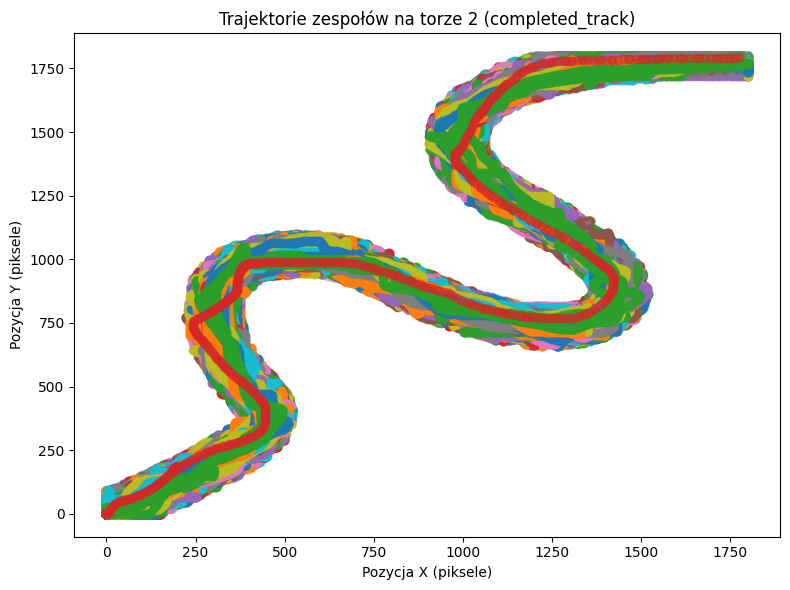

In [ ]:

plt.figure(figsize=(8, 6))
unique_teams = completed_track['ID'].unique()

for team in unique_teams:
    team_data = completed_track[completed_track['ID'] == team].sort_values(by='Points_Time')
    if len(team_data) > 1:
        plt.plot(team_data['Points_X'], team_data['Points_Y'], marker='o', linestyle='None', alpha=0.5)

plt.xlabel("Pozycja X (piksele)")
plt.ylabel("Pozycja Y (piksele)")
plt.title("Trajektorie zespołów na torze 2 (completed_track)")
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import glob
import os
import random
# Ścieżka do katalogu z plikami CSV
csv_files = glob.glob("./drive/MyDrive/ortho/data/*.csv")

# Wybór losowych 5 plików
random_files = random.sample(csv_files, 5)

# Inicjalizacja listy dla DataFrame
df_list = []

# Wczytanie wybranych 5 plików i dodanie do listy
for file in random_files:
    try:
        df = pd.read_csv(file)
        df_list.append(df)
    except Exception as e:
        print(f"Błąd podczas przetwarzania pliku {file}: {e}")

# Połączenie wszystkich wczytanych ramek w jedną
limited_data_sampled_5 = pd.concat(df_list, ignore_index=True)

<ipython-input-4-70498dc2f43d>:17: DtypeWarning: Columns (24) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)
<ipython-input-4-70498dc2f43d>:17: DtypeWarning: Columns (24) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)
<ipython-input-4-70498dc2f43d>:17: DtypeWarning: Columns (24) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)
<ipython-input-4-70498dc2f43d>:17: DtypeWarning: Columns (24) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)


In [ ]:
limited_data_sampled_5['Track_ID'] = limited_data_sampled_5['Track_ID'].ffill()
limited_data_sampled_5['Completed.1'] = limited_data_sampled_5['Completed.1'].ffill()

# Filtrowanie limited_data dla tych ID
completed_track_sampled_5 = limited_data_sampled_5.loc[(limited_data_sampled_5['Track_ID'] == 2) & (limited_data['Completed.1'] == True), ]
completed_track_sampled_5 = completed_track_sampled_5.dropna(subset=['Points_X'])

In [ ]:
completed_track_sampled_5.head()

,ID,Date,Consent,Team_Name,Selected_Language,Consent_Time_X_axis,Age_X_axis,Companionship_X_axis,Question_Time_X_axis,Consent_Time_Y_axis,...,ClosingTime.1,Time,Mistake,Completed.1,InterfaceMode_Time,InterfaceMode_Mode,Points_X,Points_Y,Points_Time,Points_Status
22877,20240204-0007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,True,NaN,NaN,1131.0,1645.0,09:43:13:104,1.0
24380,20240204-0007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,True,NaN,NaN,1039.0,1538.0,09:44:02:154,1.0
24396,20240204-0007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,True,NaN,NaN,1044.0,1564.0,09:44:02:437,1.0
24411,20240204-0007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,True,NaN,NaN,1061.0,1590.0,09:44:02:704,1.0
24430,20240204-0007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,True,NaN,NaN,1096.0,1628.0,09:44:03:021,1.0


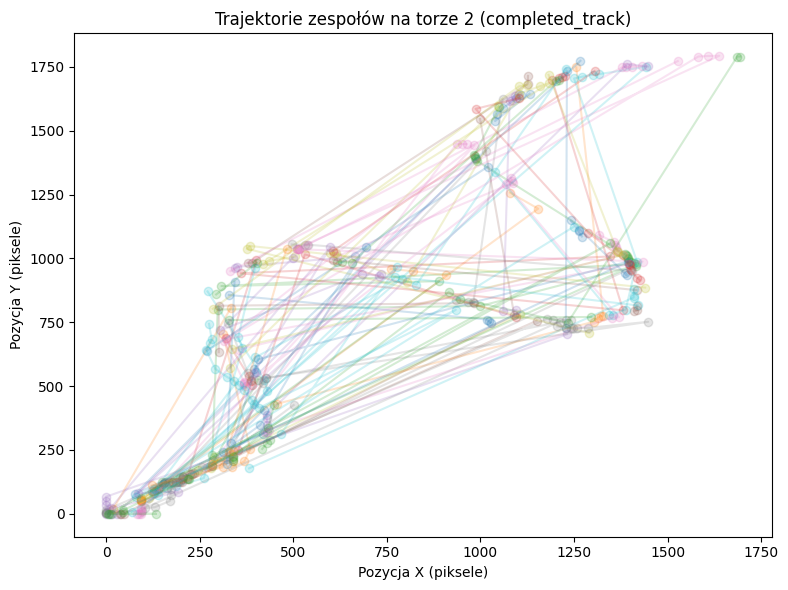

In [ ]:
plt.figure(figsize=(8, 6))
unique_teams = completed_track_sampled_5['ID'].unique()

for team in unique_teams:
    team_data = completed_track_sampled_5[completed_track_sampled_5['ID'] == team].sort_values(by='Points_Time')
    if len(team_data) > 1:
        plt.plot(team_data['Points_X'], team_data['Points_Y'], marker='o', linestyle='-', alpha=0.2)

plt.xlabel("Pozycja X (piksele)")
plt.ylabel("Pozycja Y (piksele)")
plt.title("Trajektorie zespołów na torze 2 (completed_track)")
plt.tight_layout()
plt.show()

In [ ]:
limited_data['Track_ID'].nunique()

7

In [ ]:
all_points = completed_track[['Points_X', 'Points_Y', 'Game_id']].copy()
all_points.head()

,Points_X,Points_Y,Game_id
2,0.0,0.0,20240102-0000_09:31:04:583
3,1.0,0.0,20240102-0000_09:31:04:583
4,2.0,0.0,20240102-0000_09:31:04:583
5,3.0,0.0,20240102-0000_09:31:04:583
6,4.0,0.0,20240102-0000_09:31:04:583


In [ ]:
best_points.head()

,Points_X,Points_Y,Game_id
6827806,0.0,0.0,20240126-0099_18:12:03:407
6827807,1.0,0.0,20240126-0099_18:12:03:407
6827808,3.0,0.0,20240126-0099_18:12:03:407
6827809,6.0,0.0,20240126-0099_18:12:03:407
6827810,11.0,0.0,20240126-0099_18:12:03:407


In [ ]:
import numpy as np

In [ ]:
# 1. Tworzymy tablicę numpy z "najlepszej" trajektorii
best_points_array = best_points[['Points_X', 'Points_Y']].to_numpy()

# 2. Obliczamy DTW dla każdej innej trajektorii z all_points
results = []
# Grupujemy po Game_id, aby uzyskać trajektorię każdej rozgrywki
for game_id, group in all_points.groupby('Game_id'):
    # Upewnij się, że jeśli potrzebujesz konkretnej kolejności (np. chronologicznej),
    # to posortuj group przed konwersją do tablicy numpy.
    trajectory_array = group[['Points_X', 'Points_Y']].to_numpy()

    # Obliczamy DTW
    distance = dtw_distance(trajectory_array, best_points_array)

    # Dodajemy wynik do listy
    results.append({
        'Game_id': game_id,
        'DTW_distance': distance
    })

# 3. Tworzymy ramkę wynikową
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='DTW_distance', ascending=True)

KeyboardInterrupt: 